# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of
glass using their chemical properties as one of six classes. The dataset was credited to Vina
Spiehler in 1987. The study of classification of types of glass was motivated by criminological
investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly
identified!


    The chemical compositions are measured as the weight percent in corresponding oxide.

# Attribute Information-

    1.  Id number: 1 to 214
    2.  RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes
    4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute)
    
    
    
     1- building_windows_float_processed
     2- building_windows_non_float_processed
     3- vehicle_windows_float_processed
     4- vehicle_windows_non_float_processed (none in this database)
     5- containers
     6- tableware
     7- headlamps
    
There are 214 observations in the dataset. The dataset can be divided into window glass
(classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

# Predict : Type of glass

# Dataset Link-
 https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
 https://github.com/dsrscientist/dataset3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.head(3)


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


# EDA

In [4]:
df.isnull().sum() #Calculating number of null Values Belonging to each Column


Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [5]:
df.shape #Shape of Data


(213, 11)

In [7]:
df.nunique()

Id            213
RI            177
Na            142
Mg             93
Al            117
Si            132
K              65
Ca            143
Ba             34
Fe             32
glass_type      6
dtype: int64

In [9]:
# Checking Data type of Columns
df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

In [15]:
df.drop('Id',axis=1,inplace=True) # dropping unnecessary columns

# Statistics of Dataset


Descriptive statistics

    Summarizing the distribution of the numerical variables.



In [21]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


summary:
    
    1 The mean<median (50%) for  mg,si and k means the data is skewed to left
    2 the mean>median(50%) for Ri,Na,Aiand Ca means the data is skewed to right
    3 The count of all the columns is the same
    4 From this we can also notice std, min and max value
    5 for Ba and Fe the 50% value is zero

# Data Visualization

In [29]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

X=df.drop('glass_type',axis=1)
y=df['glass_type']

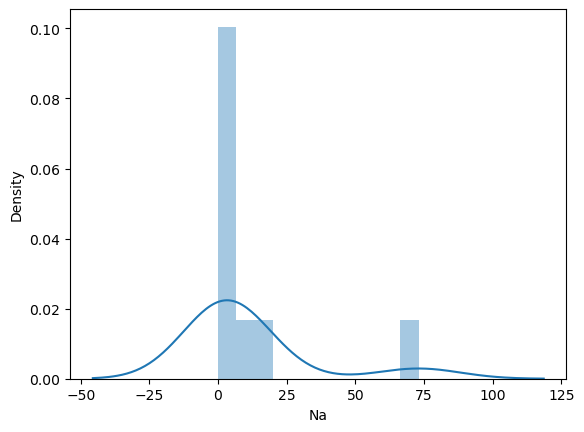

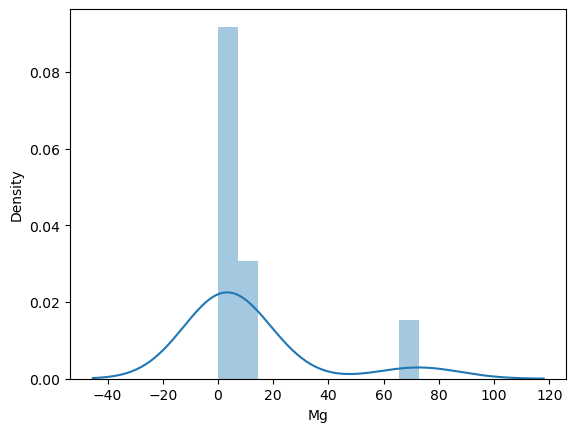

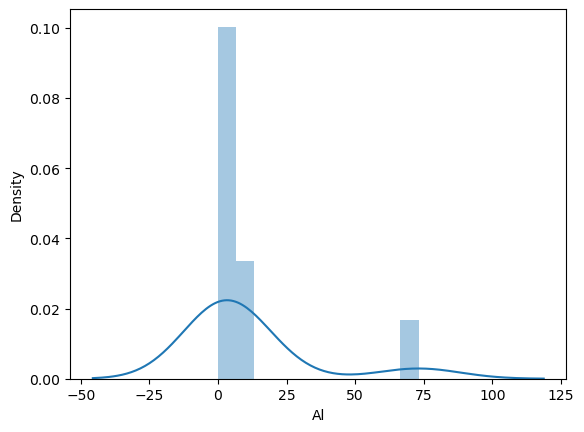

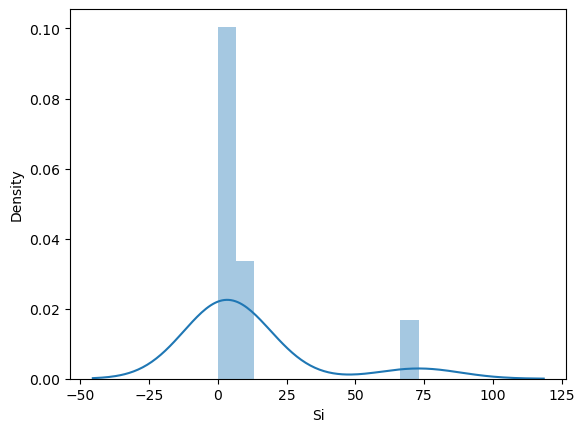

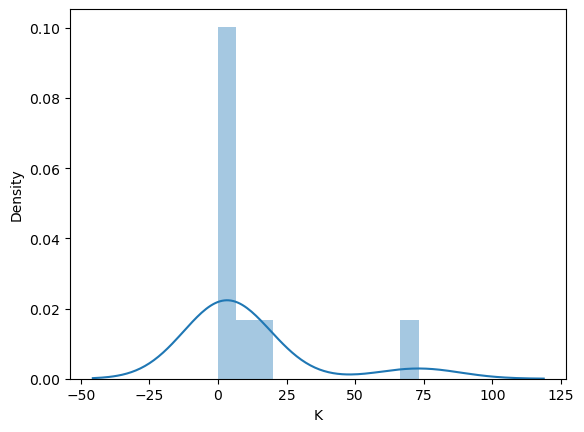

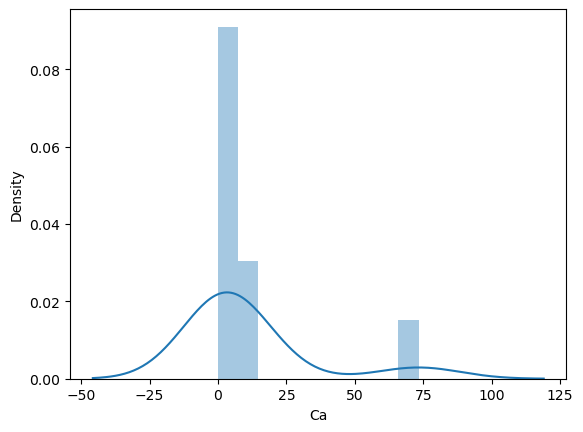

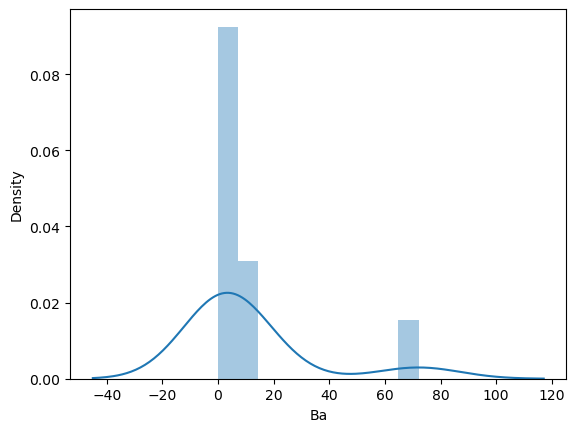

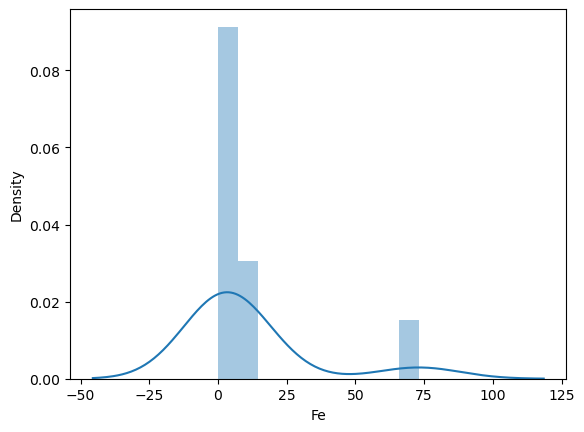

In [31]:
x=X.values
for i in range(1,9):
        sns.distplot(x[i])
        plt.xlabel(features[i])
        plt.show()
     


from the above the data is skewed to both +ve and -ve side

# Using Multivariate Plots

<Figure size 800x800 with 0 Axes>

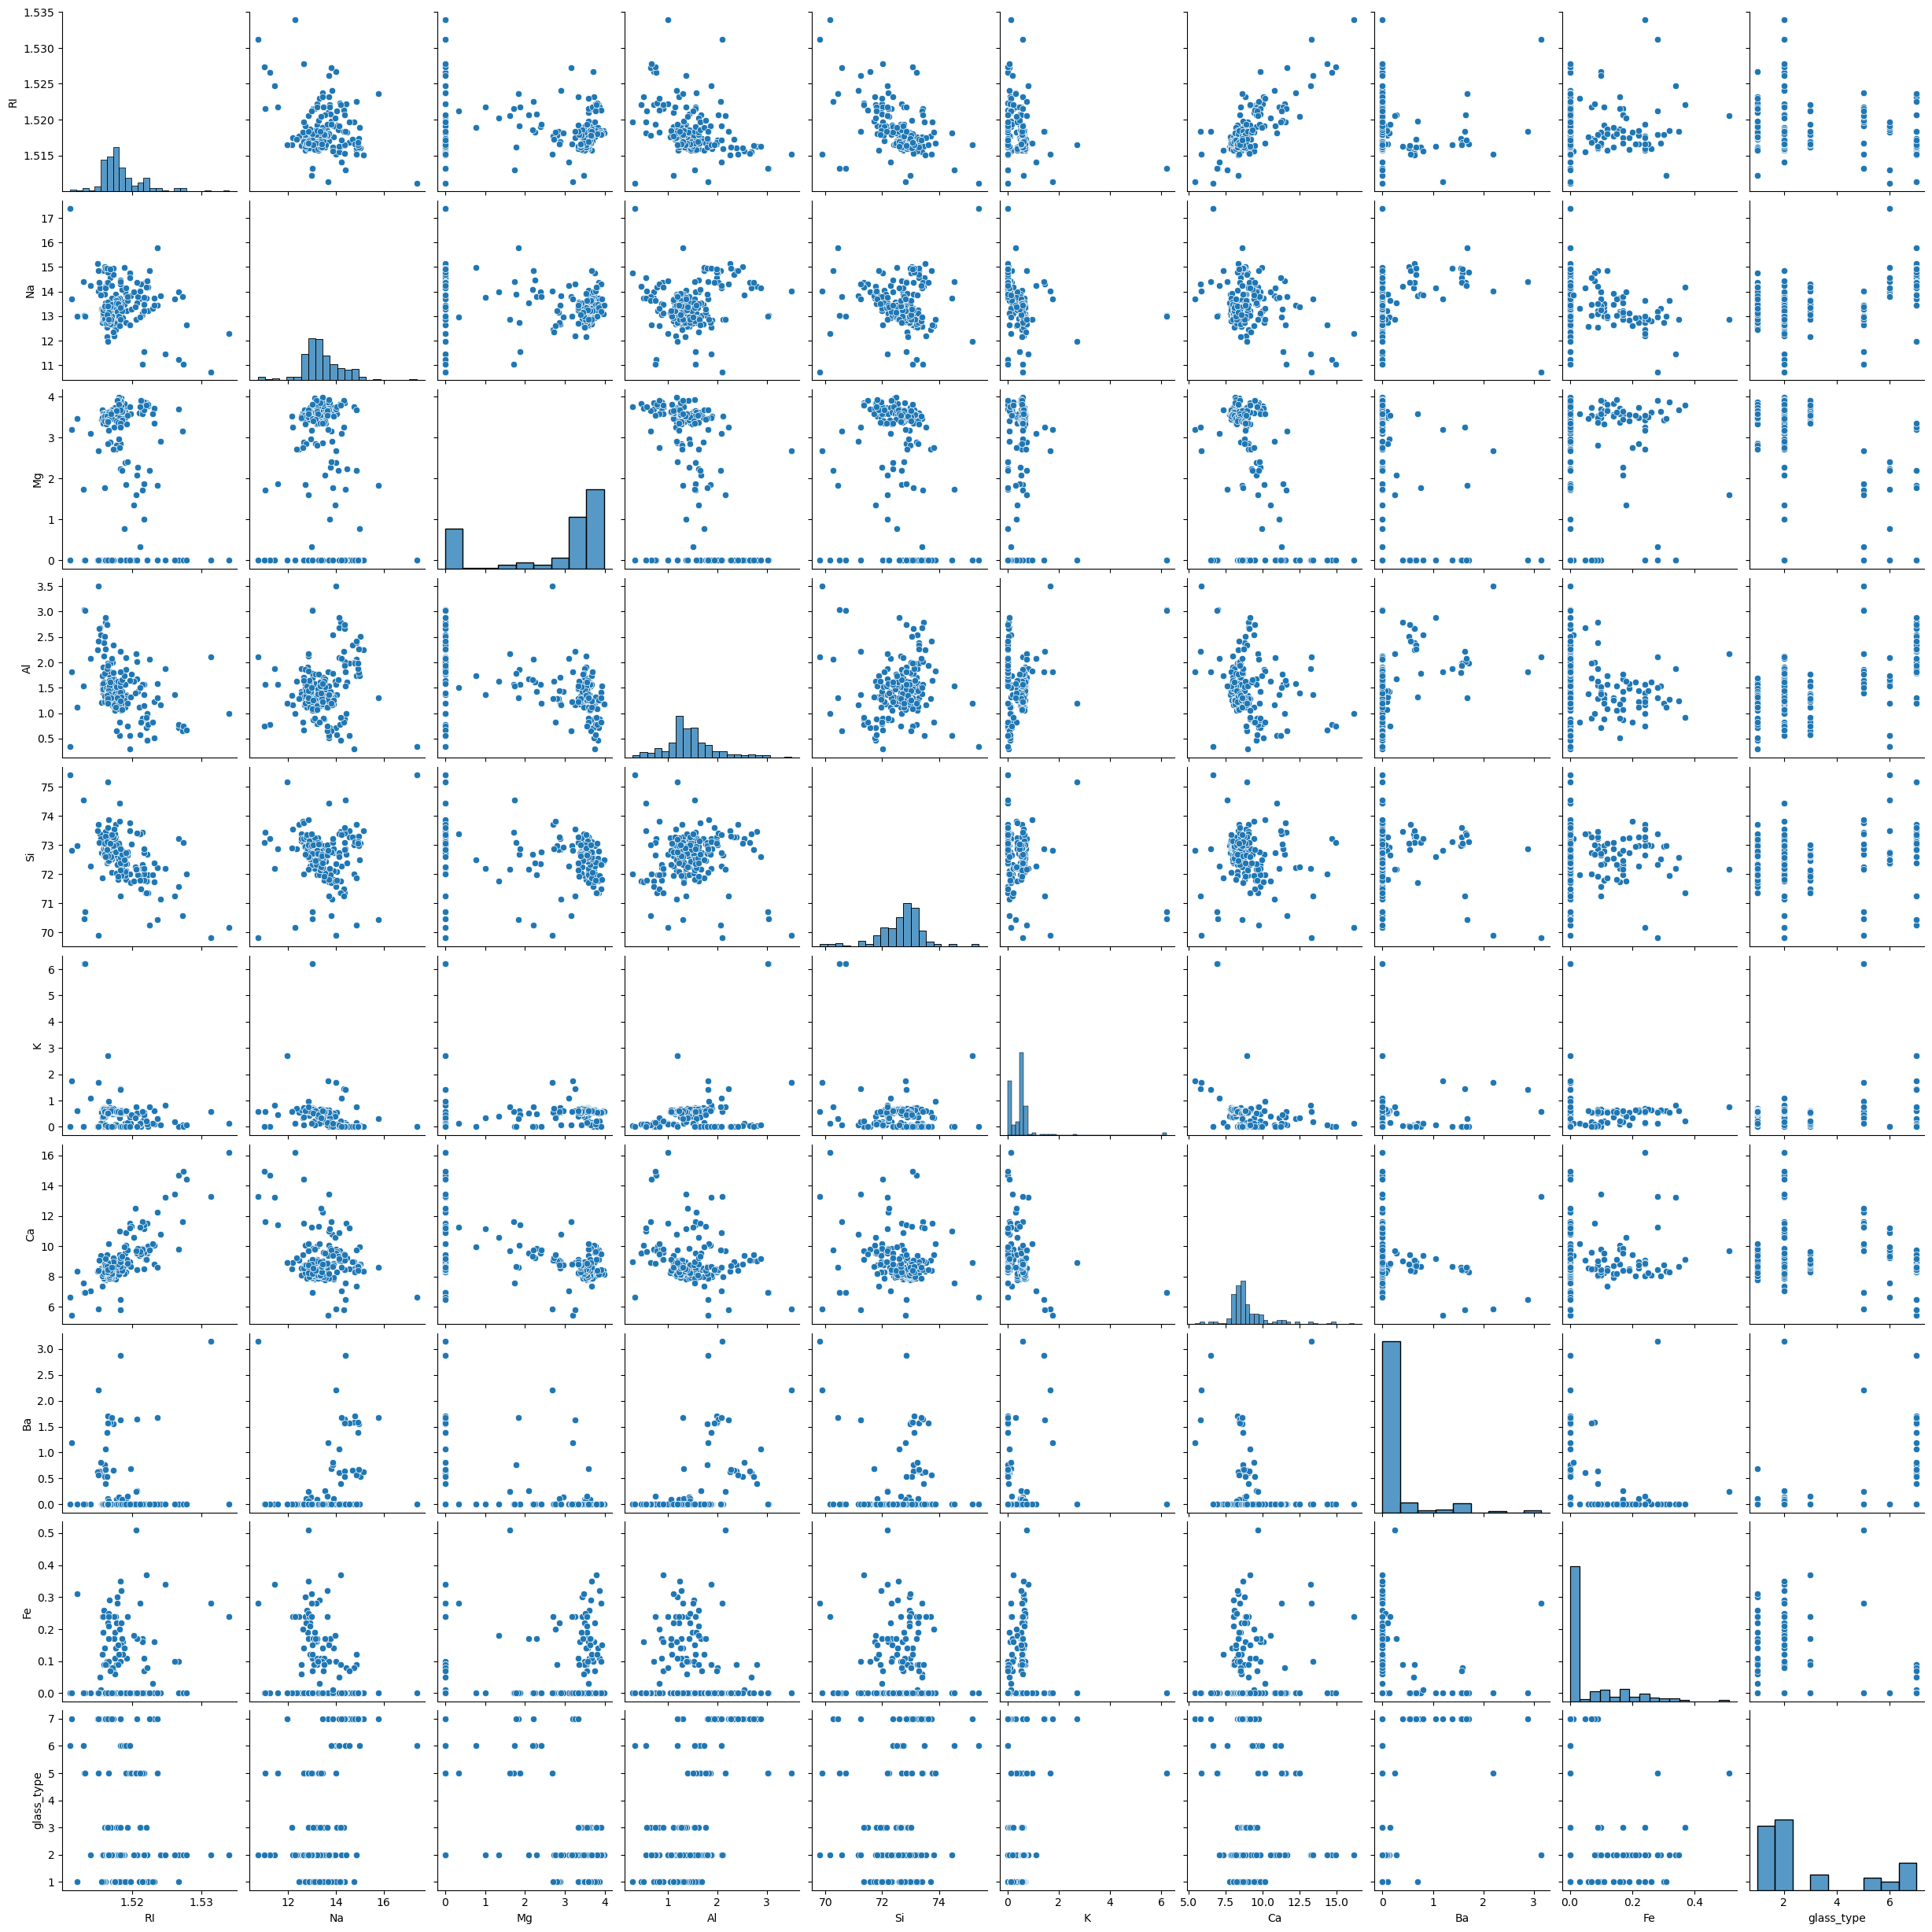

In [32]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df)
plt.show()


# skewness

In [33]:
df.skew()

RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.108861
dtype: float64

Outcomes

    1 The distribution of potassium (K) and Barium (Ba) seem to contain many outliers.
    2 The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients).
    3 None of the features follow Normal Distribution (are not normally distributed).

In [47]:
df1=np.cbrt(df[['K','Ca','Ba','Fe','RI']])

In [48]:
df.skew()

K    -0.602542
Ca    1.402709
Ba    2.065220
Fe    0.887382
RI    1.631276
dtype: float64

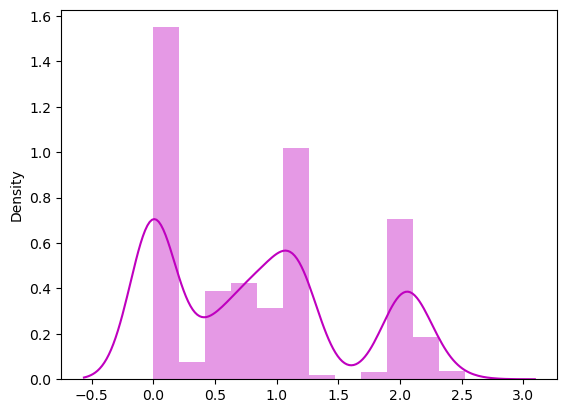

In [49]:
sns.distplot(df[['K','Ca','Ba','Fe','RI']],color='m')
plt.show()

# Correlation

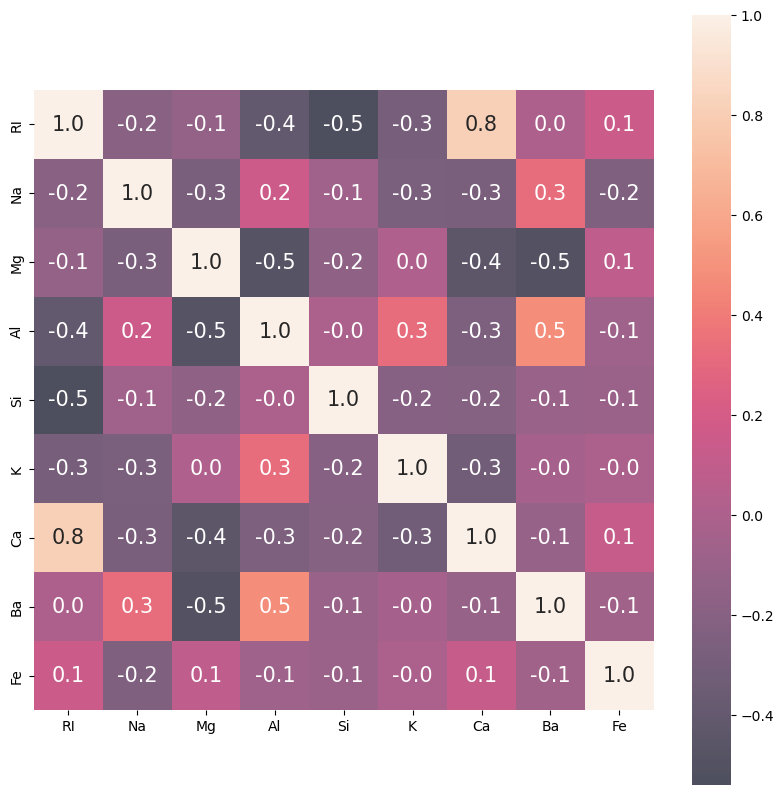

In [42]:
coreleation= X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7)
plt.show()
     

Outcomes

    1 AI and Ba have intermediate correlation between each other.
    2 RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )

# Outlier Detection

In [56]:
from collections import Counter

In [60]:
def detect_outliers(df,n,features):
    
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(df,2,['K','Ca','Ba','Fe','RI'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 2 indices:  [105, 184]


In [61]:
df.loc[outliers_to_drop, :]


,K,Ca,Ba,Fe,RI
105,0.833955,2.369285,1.465897,0.654213,1.152609
184,1.207362,1.757654,1.059699,0.000000,1.147584


In [62]:
# Drop outliers and reset index

print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df)))


Before: 213 rows
After: 211 rows


# Standard Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


# Machine Learning Model Building


In [68]:
#importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (159, 9)
Training target vector size: (159,)
Test feature matrix size: (54, 9)
Test target vector size: (54,)


# Finding best Random state¶


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.78125 on Random_state 127


In [71]:
model=[ LogisticRegression(),KNeighborsClassifier(),SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        ]
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+' Classification ML Algorithm Evaluation Matrix',m,'is'+'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score  :'+'\033[0m', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix  :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'classification Report'+'\033[0m \n',classification_report(Y_test, y_pred))


 Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score  : 0.609375


Confusion matrix  : 
 [[12 11  0  0  0  0]
 [ 3 14  0  1  1  0]
 [ 3  2  0  0  0  0]
 [ 0  2  0  3  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  9]]


classification Report 
               precision    recall  f1-score   support

           1       0.67      0.52      0.59        23
           2       0.45      0.74      0.56        19
           3       0.00      0.00      0.00         5
           5       0.75      0.60      0.67         5
           6       0.50      0.33      0.40         3
           7       1.00      1.00      1.00         9

    accuracy                           0.61        64
   macro avg       0.56      0.53      0.54        64
weighted avg       0.60      0.61      0.59        64

 Classification ML Algorithm Evaluation Matrix KNeighborsClassifier() is


Accuracy Score  : 0.671875


Confusion matrix  : 
 [[18  5  0  0  0  0]
 [ 8 11  0  0  0  0]
 [ 5  0  0  

from the above we can see that GradientBoostingClassifier() is giving the maximum accuracy

# Cross Validation Score

In [74]:
from sklearn.model_selection import cross_val_score
model=[ LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        SVC(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        ]

for m in model:
    score = cross_val_score(m, X,y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('=======================================================')



Cross Validation Score LogisticRegression() :
Score : [0.51162791 0.65116279 0.53488372 0.52380952 0.5952381 ]
Mean Score : 0.563344407530454
Std deviation : 0.05249169435215948




Cross Validation Score KNeighborsClassifier() :
Score : [0.48837209 0.62790698 0.60465116 0.57142857 0.73809524]
Mean Score : 0.6060908084163898
Std deviation : 0.08119403163001786




Cross Validation Score DecisionTreeClassifier() :
Score : [0.58139535 0.53488372 0.60465116 0.5952381  0.52380952]
Mean Score : 0.5679955703211517
Std deviation : 0.03260105201933759




Cross Validation Score SVC() :
Score : [0.34883721 0.34883721 0.34883721 0.35714286 0.38095238]
Mean Score : 0.356921373200443
Std deviation : 0.012438645476942598




Cross Validation Score RandomForestClassifier() :
Score : [0.60465116 0.79069767 0.6744186  0.5952381  0.83333333]
Mean Score : 0.6996677740863787
Std deviation : 0.09666867050594473




Cross Validation Score AdaBoostClassifier() :
Score : [0.41860465 0.27906977 0.41860465 0

Cross Validation Score for GradientBoostingClassifier() is high

# Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [79]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [81]:
cv.best_params_


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

# Final Model

In [83]:
Final_mod = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 1, n_estimators= 250,random_state= 127)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final GradientBoosting Classifier  Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix  :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report '+'\033[0m \n',classification_report(Y_test, y_pred))

Final GradientBoosting Classifier  Model
Accuracy Score :
 0.734375


Confusion matrix  : 
 [[15  5  3  0  0  0]
 [ 1 15  1  0  1  1]
 [ 2  1  1  0  1  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]]


Classification Report  
               precision    recall  f1-score   support

           1       0.83      0.65      0.73        23
           2       0.68      0.79      0.73        19
           3       0.20      0.20      0.20         5
           5       1.00      0.80      0.89         5
           6       0.60      1.00      0.75         3
           7       0.90      1.00      0.95         9

    accuracy                           0.73        64
   macro avg       0.70      0.74      0.71        64
weighted avg       0.75      0.73      0.73        64



# saving the model

In [85]:
import joblib
joblib.dump(Final_mod,'Glass_Identification_Project.pkl')


['Glass_Identification_Project.pkl']

# Predicting the Final Model¶


In [86]:
prediction = Final_mod.predict(X_test)


In [87]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
